# Task-04: Covid-19 Data Analysis
# Author: Ferzeen Tahir

### Introduction:
#### Objective: 
The goal of this analysis is to examine the COVID-19 data to gain insights into the global impact of the pandemic. The key metrics to be analyzed include the total number of cases, deaths, recoveries, active cases, and serious cases. By visualizing these metrics, the objective is to identify patterns and trends that can be useful for understanding the severity of the pandemic across different countries and regions.

#### Dataset Overview:
The dataset consists of 230 entries, each representing a country or region. The columns in the dataset are as follows:

- **Country/Other:** The name of the country or region.
- **Total Cases:** The total number of reported COVID-19 cases.
- **Total Deaths:** The total number of deaths due to COVID-19.
- **New Deaths:** The number of new deaths reported (only a few entries have this data).
- **Total Recovered:** The total number of recovered cases.
- **Active Cases:** The number of active cases.
- **Serious/Critical:** The number of serious or critical cases.
- **Tot Cases/1M pop:** The total number of cases per 1 million people.
- **Deaths/1M pop:** The number of deaths per 1 million people.
- **Total Tests:** The total number of COVID-19 tests conducted.
- **Tests/1M pop:** The number of tests conducted per 1 million people.
- **Population:** The population of the country or region.

You can view the [COVID-19 Dashboard](https://public.tableau.com/views/Covid-19Dashboard_17239995903290/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) for more detailed insights and visualizations.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv('Covid Live.csv')

In [3]:
# Display the first five rows of the dataframe
df.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [4]:
# Display the shape of the dataframe (number of rows and columns)
df.shape

(230, 13)

In [5]:
# Display the columns in the dataframe
df.columns

Index(['#', 'Country,\nOther', 'Total\nCases', 'Total\nDeaths', 'New\nDeaths',
       'Total\nRecovered', 'Active\nCases', 'Serious,\nCritical',
       'Tot Cases/\n1M pop', 'Deaths/\n1M pop', 'Total\nTests',
       'Tests/\n1M pop', 'Population'],
      dtype='object')

In [6]:
# Drop the "#" column which seems to be unnecessary
df.drop(columns=['#'], inplace=True)

In [7]:
# Rename columns to more descriptive names
columns= df.columns.tolist()
columns[0]="Country"
columns[1]="TotalCases"
columns[2]="TotalDeaths"
columns[3]= "NewDeaths"
columns[4]="TotalRecovered"
columns[5]="ActiveCases"
columns[6]="SeriousCases"
columns[7]="TotalCases/1M pop"
columns[8]="Deaths/1M pop"
columns[9]="TotalTests"
columns[10]="Test/1M pop"
df.columns=columns

# Display the updated dataframe with new column names
df.head()

,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCases,TotalCases/1M pop,Deaths/1M pop,TotalTests,Test/1M pop,Population
0,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [8]:
# Convert relevant columns to numeric types and clean the data
columns_to_numeric = [
    'TotalCases', 'TotalDeaths','TotalRecovered',
    'ActiveCases', 'SeriousCases', 'TotalCases/1M pop',
    'Deaths/1M pop', 'TotalTests', 'Test/1M pop', 'Population'
]

# Remove commas and convert to numeric, errors='coerce' will convert invalid parsing to NaN
for column in columns_to_numeric:
    df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

In [9]:
# Check for missing values in the dataframe
df.isnull().sum()

Country                0
TotalCases             0
TotalDeaths            5
NewDeaths            227
TotalRecovered        16
ActiveCases           15
SeriousCases          83
TotalCases/1M pop      2
Deaths/1M pop          7
TotalTests            16
Test/1M pop           16
Population             2
dtype: int64

In [10]:
# Replace all null values with 0
df.fillna(0, inplace=True)

In [11]:
# Display the updated DataFrame info to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            230 non-null    object 
 1   TotalCases         230 non-null    int64  
 2   TotalDeaths        230 non-null    float64
 3   NewDeaths          230 non-null    float64
 4   TotalRecovered     230 non-null    float64
 5   ActiveCases        230 non-null    float64
 6   SeriousCases       230 non-null    float64
 7   TotalCases/1M pop  230 non-null    float64
 8   Deaths/1M pop      230 non-null    float64
 9   TotalTests         230 non-null    float64
 10  Test/1M pop        230 non-null    float64
 11  Population         230 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 21.7+ KB


In [12]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()

0

In [13]:
# Verify the total number of entries in the 'Country' column
df['Country'].value_counts().sum()

230

In [14]:
# Calculate the total number of COVID-19 cases
df['TotalCases'].sum()

622372853

In [15]:
# Plot the distribution of Total Cases
fig = px.histogram(df, x='TotalCases', title="Distribution of Total Cases")
fig.show()

In [16]:
# Calculate the total number of COVID-19 deaths
df['TotalDeaths'].sum()

6547095.0

In [17]:
# Plot the distribution of Total Deaths
fig = px.histogram(df, x='TotalDeaths', title="Distribution of Total Deaths")
fig.show()

In [18]:
# Calculate the total number of COVID-19 recoveries
df['TotalRecovered'].sum()

600752515.0

In [19]:
# Plot the distribution of Total Recovered
fig = px.histogram(df, x='TotalRecovered', title="Distribution of Total Recovered")
fig.show()

In [20]:
# Calculate the total number of Active Cases
df['ActiveCases'].sum()

12351524.0

In [21]:
# Plot the distribution of Active Cases
fig = px.histogram(df, x='ActiveCases', title="Distribution of Active Cases")
fig.show()

In [22]:
# Calculate the total number of Serious Cases
df['SeriousCases'].sum()

39723.0

In [23]:
# Plot the distribution of Serious Cases
fig = px.histogram(df, x='SeriousCases', title="Distribution of Serious Cases")
fig.show()

In [24]:
# Plot Total Cases vs Total Recovered
fig = px.scatter(df, x='TotalCases', y='TotalRecovered', title="Total Cases vs Total Recovered", color_continuous_scale='Viridis', color='TotalRecovered')
fig.show()

In [25]:
# Plot Total Cases vs Total Deaths
fig = px.scatter(df, x='TotalCases', y='TotalDeaths', title="Total Cases vs Total Deaths", color_continuous_scale='Viridis', color='TotalDeaths')
fig.show()

In [26]:
# Plot Total Cases vs Active Cases
fig = px.scatter(df, x='TotalCases', y='ActiveCases', title="Total Cases vs Active Cases", color_continuous_scale='Viridis', color='ActiveCases')
fig.show()

In [27]:
# Plot Total Population vs Serious Cases
fig = px.scatter(df, x='TotalCases', y='SeriousCases', title="Total Cases vs Serious Cases", color_continuous_scale='Viridis', color='SeriousCases')
fig.show()

In [28]:
# Plot Total Population vs Total Tests
fig = px.scatter(df, x='Population', y='TotalTests', title="Total Population vs Total Tests", color_continuous_scale='Viridis', color='TotalTests')
fig.show()

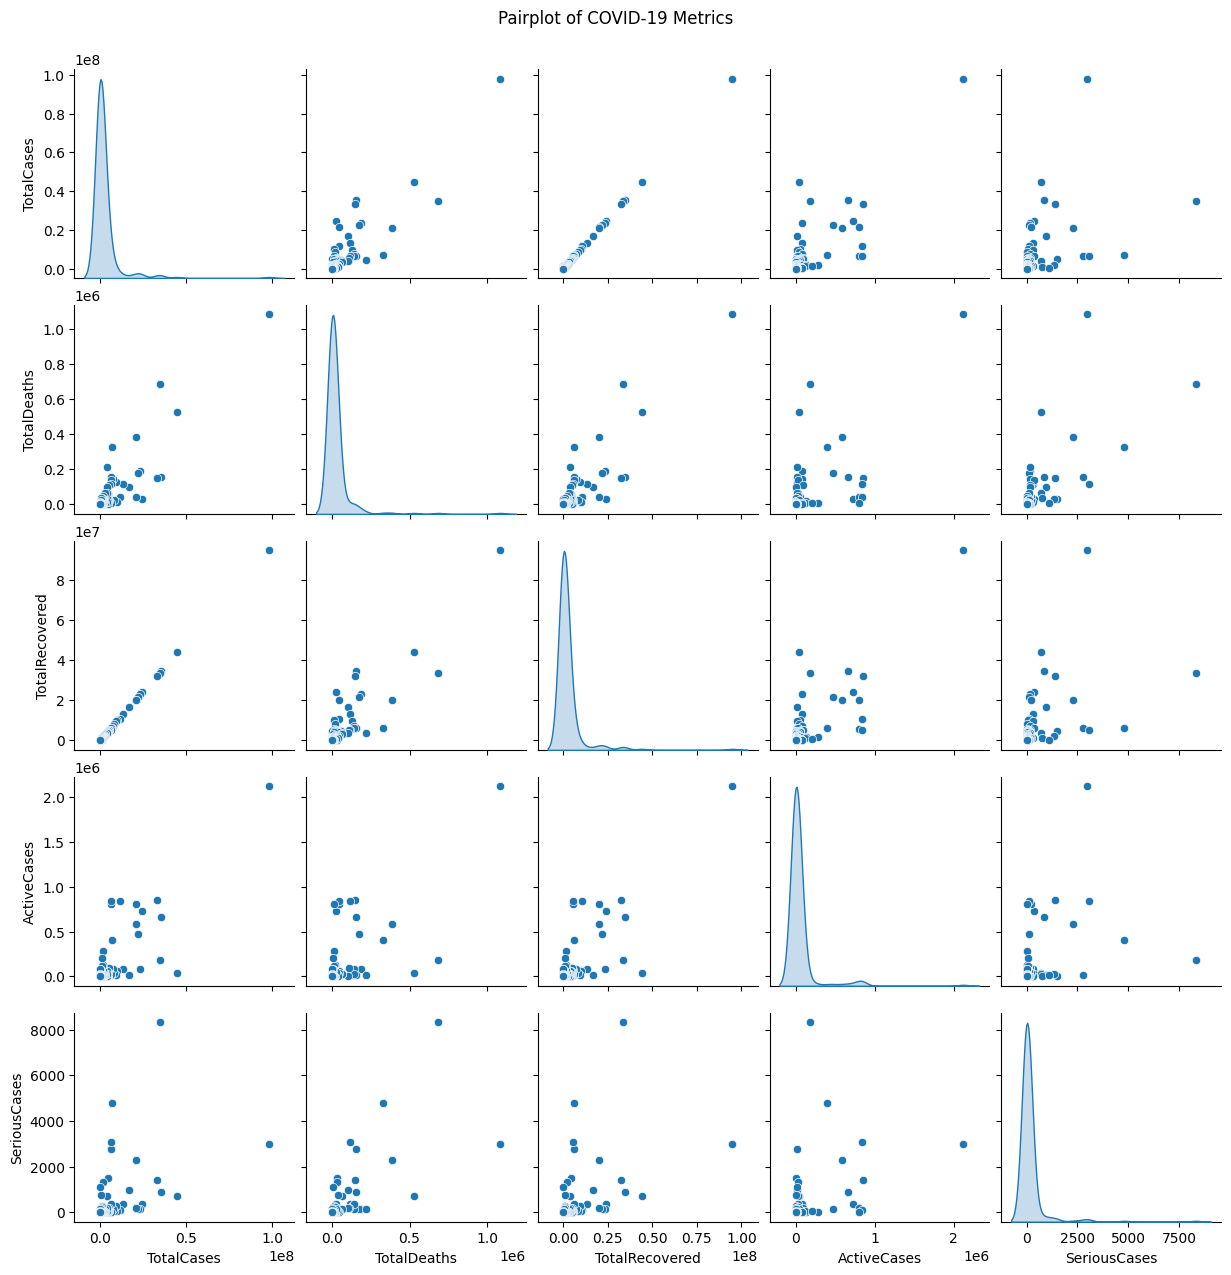

In [29]:
# Create a pairplot to visualize relationships between selected metrics
sns.pairplot(df[['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCases']], diag_kind='kde')
plt.suptitle("Pairplot of COVID-19 Metrics", y=1.02)
plt.show()

## Key Findings:
1. The total number of COVID-19 cases globally is 622,372,853.
2. The total number of COVID-19 deaths globally is 6,547,095.
3. The total number of recovered cases globally is 600,752,515.
4. The total number of active COVID-19 cases globally is 12,351,524.
5. The total number of serious cases globally is 39,723.